In [75]:
from sklearn import linear_model
import pandas as pd
import numpy as np

In [76]:
# Import csv with grade info
df = pd.read_csv("grades.csv", sep="\t")
df

,Class,Term,Median,Grade
0,ENGL015,20F,A-,B+
1,MATH011,20F,A-,A-
2,PHYS013,20F,A,B
3,FREN002,21W,A-,A-
4,WRIT005.26,21W,A,A
5,COLT07.19,21S,A-,A-
6,FREN003,21S,A-,A
7,MATH023,21S,B+,NR
8,AAAS011,21F,A,A
9,ECON01,21F,B+,B+


In [77]:
# A dictionary that converts letter grades to numbers 0-12
# Only 8-12 are applicable, 6 and 7 included as buffer
gpa_dict = {
    "A" : 12, 
    "A-" : 11, 
    "B+" : 10, 
    "B" : 9, 
    "B-" : 8, 
    "C+" : 7, 
    "C" : 6
}

# A dictionary converting the terms into integers
term_dict = {
    "20F" : 1, 
    "21W" : 2, 
    "21S" : 3, 
    "21F" : 4, 
    "22W" : 5, 
    "22S" : 6, 
    "22X" : 7, 
    "22F" : 8, 
    "23W" : 9, 
    "23F" : 10, 
    "24W" : 11, 
    "24S" : 12
}

# Using the dictionaries to change values in the data frame
df = df.replace({"Median": gpa_dict, "Grade": gpa_dict, "Term": term_dict})

# Removing the term I NRO'd since it won't count towards my GPA
df = df[df['Grade'] != "NR"]

# Creating the Department column to include in prediction (I know I preform better in some departments than others)
df['Dept'] = df['Class'].str.extract(r'(^[A-Z]{3,4})')

# creating a unique numerical value for each department 
d = {ni: indi for indi, ni in enumerate(set(df['Dept']))}
df['Dept_num'] = [d[ni] for ni in df['Dept']]

# Check the df
df

,Class,Term,Median,Grade,Dept,Dept_num
0,ENGL015,1,11,10,ENGL,3
1,MATH011,1,11,11,MATH,7
2,PHYS013,1,12,9,PHYS,9
3,FREN002,2,11,11,FREN,6
4,WRIT005.26,2,12,12,WRIT,12
5,COLT07.19,3,11,11,COLT,11
6,FREN003,3,11,12,FREN,6
8,AAAS011,4,12,12,AAAS,2
9,ECON01,4,10,10,ECON,5
10,THEA40,4,12,12,THEA,4


In [78]:
# Creating linear model
reg = linear_model.Lasso(alpha=0.1)

# Setting inputs as Median, Term, and Department to predict Grade
grades_X = df[["Median", "Term", "Dept_num"]]
grades_y = df["Grade"]

# Creating a variable that automatically updates how many courses to train on and how many to predict
temp_df = df[df['Grade'] != 'TBD']
print(len(temp_df.index))
completed_courses = len(temp_df.index)

# Train and test variables
grades_X_train = grades_X[:completed_courses]
grades_X_test = grades_X[completed_courses:]

grades_y_train = grades_y[:completed_courses]
grades_y_test = grades_y[completed_courses:]

# Fit the regression to the training variables
reg.fit(grades_X_train, grades_y_train)

# Use the trained regression to predict the grades of future courses based ont heir terms, departments, and previous medians
pred = reg.predict(grades_X_test)

21


/var/folders/2j/f2bwlr752b95pbc739m9h1wc0000gn/T/ipykernel_74800/3912997054.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/var/folders/2j/f2bwlr752b95pbc739m9h1wc0000gn/T/ipykernel_74800/3912997054.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


In [79]:
# Check out the predictions to see if it worked
pred

array([11.57838415, 10.05634166, 10.05634166, 11.8490781 , 11.58495545,
       11.58495545, 11.23936322, 11.59152676, 11.06328146, 10.79305638,
       11.59809806, 11.06985276])

/var/folders/2j/f2bwlr752b95pbc739m9h1wc0000gn/T/ipykernel_74800/379257459.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


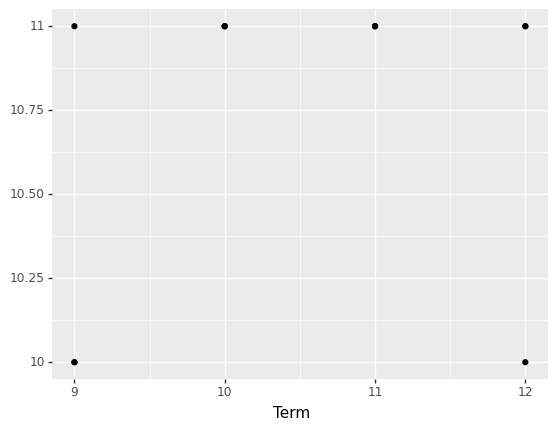

<ggplot: (323634288)>

In [80]:
# a quick graph because I'm curious (even though it's not super helpful)
from plotnine import *
ggplot(aes(x=df['Term'][completed_courses:], y=np.floor(pred))) + geom_point()

In [81]:
# I want to see the predicted values in a data frame so I create a new df that replaces the TBD values with the predicted values
pred_gpa = df.copy()
pred_gpa['Grade'][completed_courses:] = np.rint(pred)

# A peak at the new df
pred_gpa

/var/folders/2j/f2bwlr752b95pbc739m9h1wc0000gn/T/ipykernel_74800/3158225772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/2j/f2bwlr752b95pbc739m9h1wc0000gn/T/ipykernel_74800/3158225772.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


,Class,Term,Median,Grade,Dept,Dept_num
0,ENGL015,1,11,10,ENGL,3
1,MATH011,1,11,11,MATH,7
2,PHYS013,1,12,9,PHYS,9
3,FREN002,2,11,11,FREN,6
4,WRIT005.26,2,12,12,WRIT,12
5,COLT07.19,3,11,11,COLT,11
6,FREN003,3,11,12,FREN,6
8,AAAS011,4,12,12,AAAS,2
9,ECON01,4,10,10,ECON,5
10,THEA40,4,12,12,THEA,4


In [82]:
# Calculate my expected GPA using my previous grades and the predicted grades
avg_gpa = round(np.mean(pred_gpa['Grade'])/3, 2)

# Fancy little print statement
print("Your expected average GPA is: " + f'{avg_gpa}')

Your expected average GPA is: 3.66
